In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [14]:
all_data_df = pd.read_csv('xenia_db_data.zip')

In [ ]:
all_data_df.head()

In [35]:
all_data_df['Timestamp'] = pd.to_datetime(all_data_df['Timestamp'])
all_data_df['Timestamp'] = all_data_df['Timestamp'].dt.date
unique_dates_total_transactions = all_data_df.groupby('Timestamp')['TransactionHostId'].count().reset_index()
unique_dates_total_transactions.head()

,Timestamp,TransactionHostId
0,2020-12-14,4
1,2020-12-15,22
2,2020-12-16,42
3,2020-12-17,62
4,2020-12-18,56


In [39]:
unique_dates_total_transactions['Timestamp'] = pd.to_datetime(unique_dates_total_transactions['Timestamp'])
unique_dates_total_transactions['Timestamp'] = unique_dates_total_transactions['Timestamp'].dt.date
unique_dates_total_transactions = unique_dates_total_transactions[unique_dates_total_transactions['TransactionHostId'] > 0]

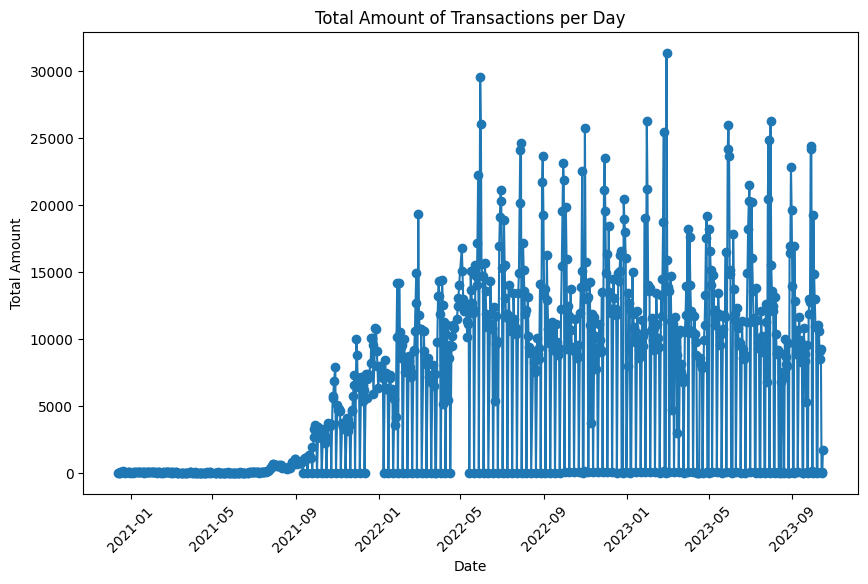

In [40]:
plt.figure(figsize=(10, 6))
plt.plot(unique_dates_total_transactions['Timestamp'], unique_dates_total_transactions['TransactionHostId'], '-o')
plt.title('Total Amount of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [55]:
unique_dates_total_transactions['Timestamp'] = pd.to_datetime(unique_dates_total_transactions['Timestamp'])
transactions_for_last_year = unique_dates_total_transactions[unique_dates_total_transactions['Timestamp'].dt.year == 2022]
transactions_for_last_year = transactions_for_last_year.dropna()
transactions_for_last_year = transactions_for_last_year[transactions_for_last_year['TransactionHostId'] > 10]
# transactions_for_last_year = transactions_for_last_year[unique_dates_total_transactions['Timestamp'].dt.month == 6]

In [59]:
transactions_for_last_year.head()

,Timestamp,TransactionHostId
278,2022-01-03,8018
279,2022-01-04,7962
280,2022-01-05,7403
281,2022-01-07,7118
282,2022-01-08,11


In [61]:
transactions_for_last_year['TransactionHostId'].min()

11

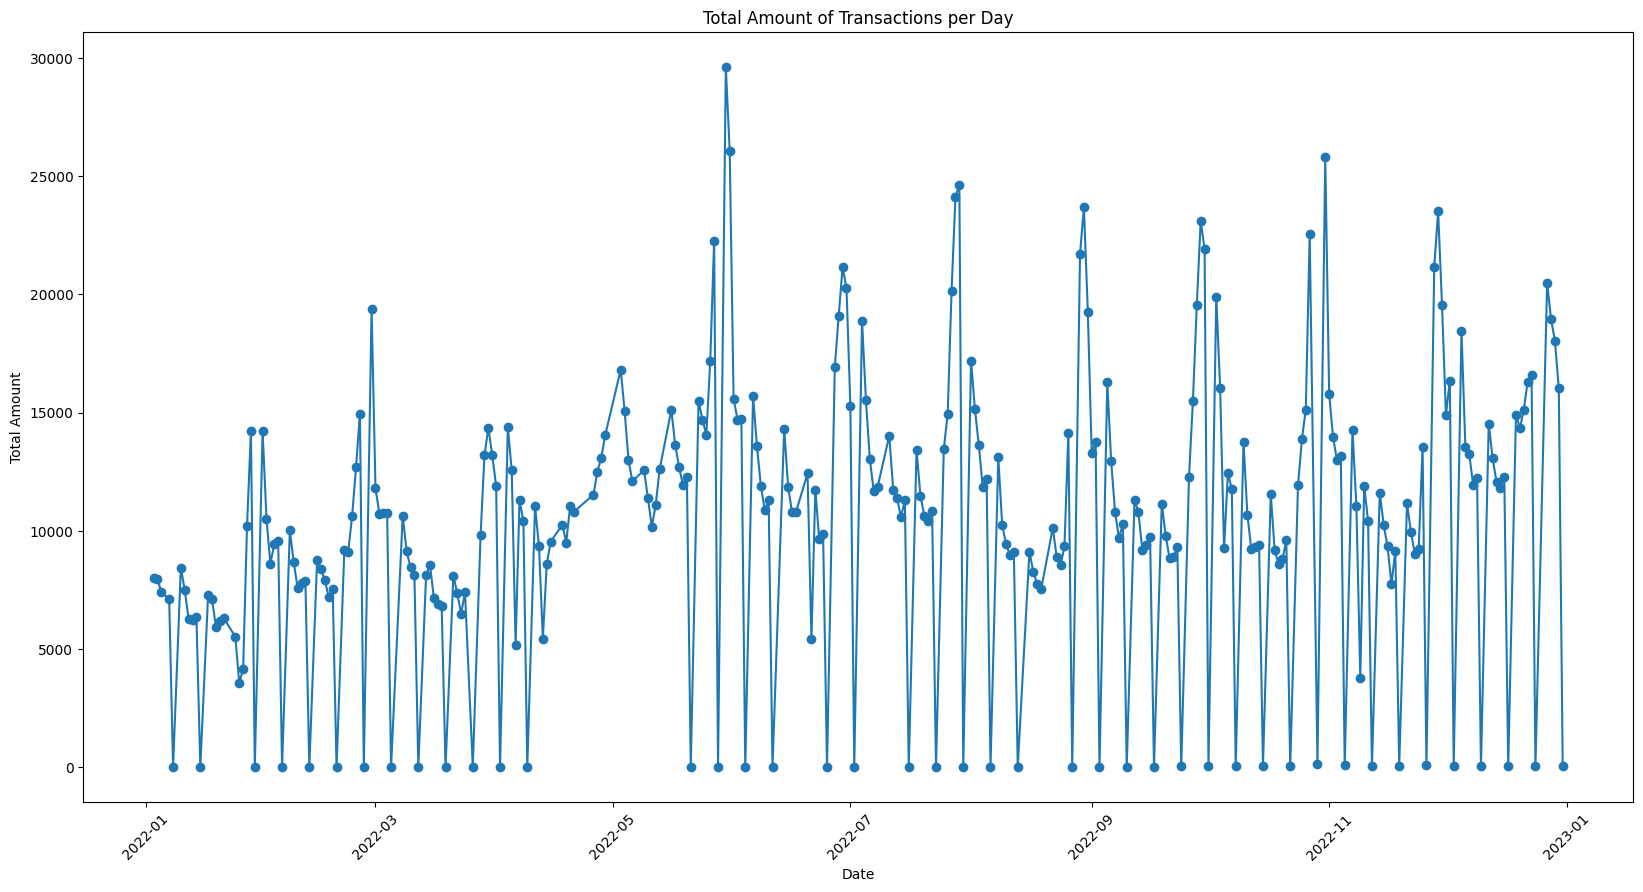

In [63]:
plt.figure(figsize=(20, 10))
plt.plot(transactions_for_last_year['Timestamp'], transactions_for_last_year['TransactionHostId'], '-o')
plt.title('Total Amount of Transactions per Day')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.xticks(rotation=45)
plt.show()

In [78]:
transactions_for_last_year['TransactionHostId'].min()

11

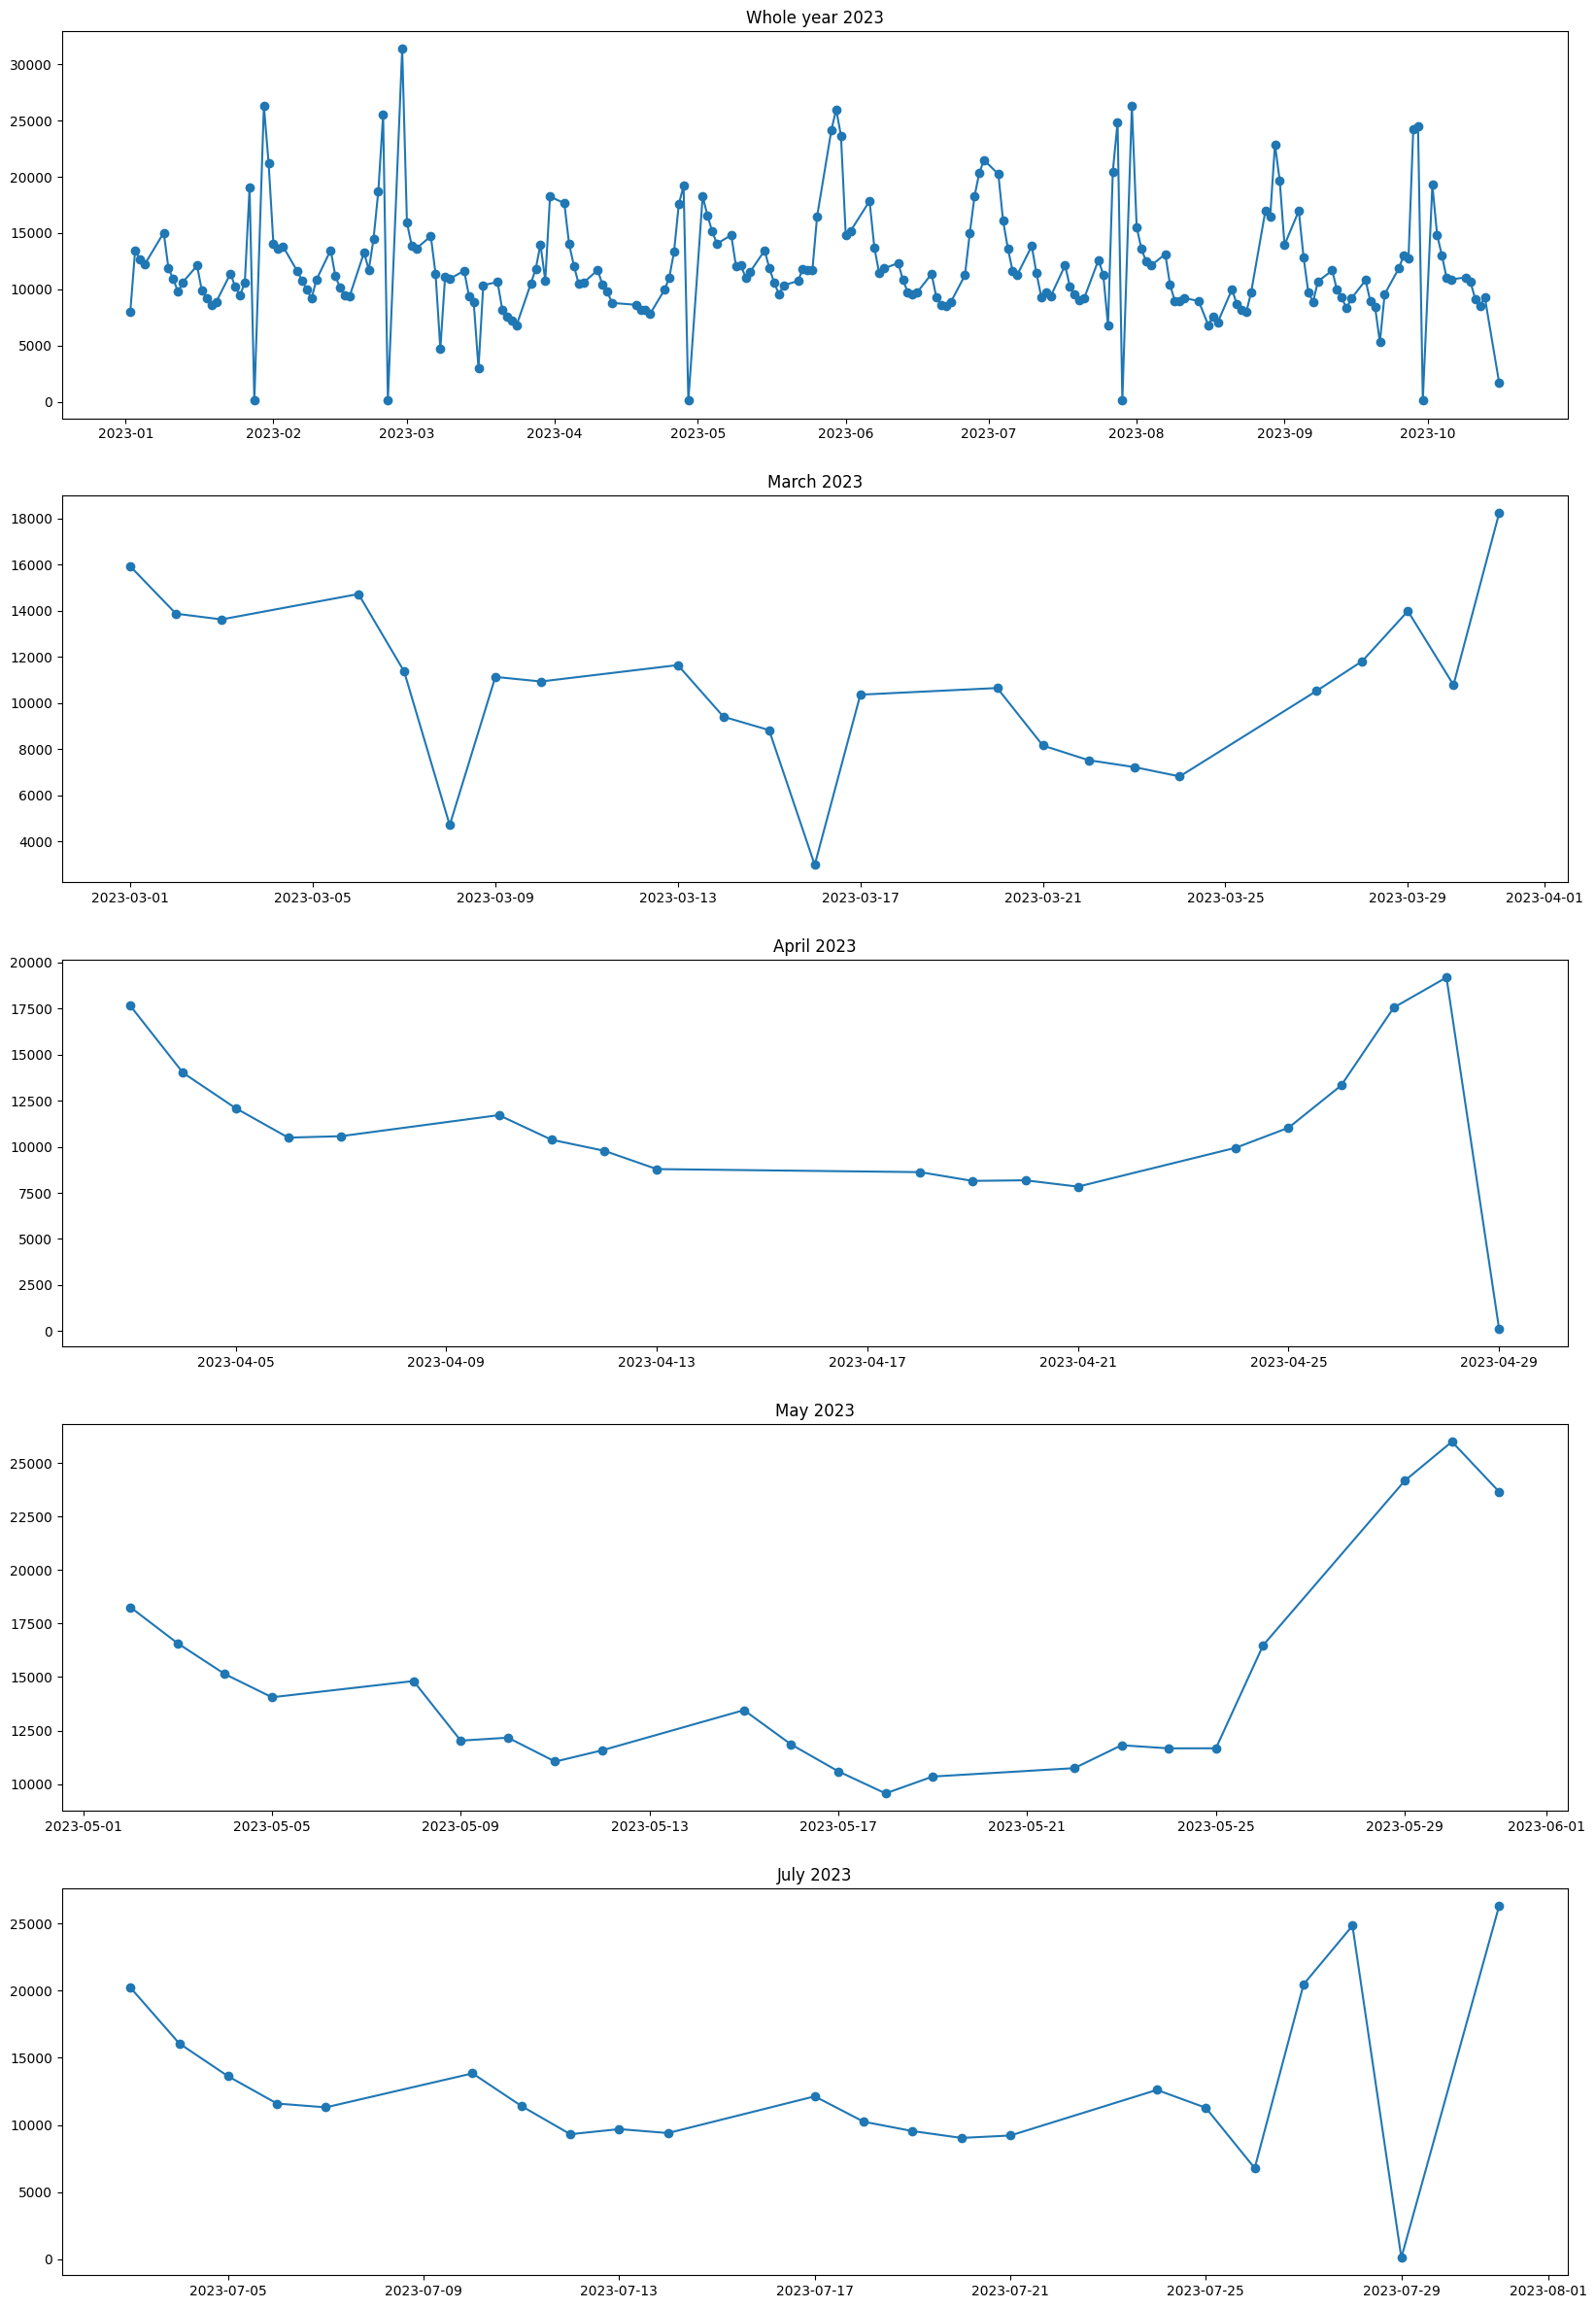

In [85]:
transactions_for_this_year = unique_dates_total_transactions[unique_dates_total_transactions['Timestamp'].dt.year == 2023]
transactions_for_this_year = transactions_for_this_year.dropna()
transactions_for_this_year = transactions_for_this_year[transactions_for_this_year['TransactionHostId'] > 100]

transactions_march = transactions_for_this_year[transactions_for_this_year['Timestamp'].dt.month == 3]
transactions_april = transactions_for_this_year[transactions_for_this_year['Timestamp'].dt.month == 4]
transactions_may = transactions_for_this_year[transactions_for_this_year['Timestamp'].dt.month == 5]
transactions_july = transactions_for_this_year[transactions_for_this_year['Timestamp'].dt.month == 7]

fig, axs = plt.subplots(5, figsize=(20, 30))

axs[0].plot(transactions_for_this_year['Timestamp'], transactions_for_this_year['TransactionHostId'], '-o')
axs[0].set_title('Whole year 2023')

axs[1].plot(transactions_march['Timestamp'], transactions_march['TransactionHostId'], '-o')
axs[1].set_title('March 2023')

axs[2].plot(transactions_april['Timestamp'], transactions_april['TransactionHostId'], '-o')
axs[2].set_title('April 2023')

axs[3].plot(transactions_may['Timestamp'], transactions_may['TransactionHostId'], '-o')
axs[3].set_title('May 2023')

axs[4].plot(transactions_july['Timestamp'], transactions_july['TransactionHostId'], '-o')
axs[4].set_title('July 2023')


plt.show()